In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')

In [2]:
from importlib import reload

import numpy as np
import tensorflow as tf
import logging
from scipy import linalg

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import make_axes_locatable

import dev_ori_sel_RF
from dev_ori_sel_RF import integrator_tf,dynamics,network,run_onelayer
from dev_ori_sel_RF import data_dir
from dev_ori_sel_RF.tools import misc,update_params_dict

2023-04-06 14:45:57.685094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Please install GPU version of TF


2023-04-06 14:46:04.210332: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
reload(misc)

config_dict = misc.load_external_params("params_test")

N4 = config_dict["N4"]
Nlgn = config_dict["Nlgn"]
Nret = config_dict["Nret"]
Nlgnpop = 2
N4pop = config_dict["num_lgn_paths"] // Nlgnpop

MISC params_dict params_test {'Nret': 20, 'Nlgn': 20, 'N4': 20, 'N23': 1, 'Nvert': 1, 'runtime': 4000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.07, 'sigma2': 0.2, 'ampl1': 1.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.045, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity': 0.6, 'SD_eccentricity': 0

In [52]:
reload(run_onelayer)
reload(integrator_tf)
Version = 0
run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

Please install GPU version of TF
# of stimuli: 16
mode in get_RFs initialize
CHECK radius 0.15
CHECK radius 0.15
mode in get_RFs initialize
CHECK radius 0.15
CHECK radius 0.15
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.16206370216865573 0.1634853135911878 0.2004777735523877 0.7074948371359112
orig max ew 2.977428066551318 0.95
max_ew 0.95
WEE=3.6373674721700744,WEI=3.1906732212018207,WIE=3.6692742043820923,WII=3.19067322120182
omega_i=Wie-Wee=0.031906732212017896
omega_e=Wii-Wei=-8.881784197001252e-16

W4to4 (800, 800)
Starting simulation. This might take a while...
...
max_freq 4.2 0.23809523809523808 1.4959965017094252
self.weight_strength 1.0
self.weight_strength 1.0
Number of plasticity steps: 32
lgn (4, 400) tf.Tensor(4.525697, shape=(), dtype=float32)

Plasticity step: 0, exp: 0, input: 0
Comment out next line if ru

Comment out next line if running with antolik_etal settings
L4 25 38.429592 94.35896 0 0
key dW_lgn_e 25 0.7572016 2.8967106
key dW_lgn_i 25 0.9444327 2.5384138
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.315908, shape=(), dtype=float32)

Plasticity step: 26, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 26 38.455643 88.27242 0 0
key dW_lgn_e 26 0.78910744 2.6772513
key dW_lgn_i 26 0.993519 2.406254
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.848301, shape=(), dtype=float32)

Plasticity step: 27, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 27 39.75683 81.53861 0 0
key dW_lgn_e 27 0.7752318 2.494283
key dW_lgn_i 27 0.9799831 2.3111732
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.2804503, shape=(), dtype=float32)

Plasticity step: 28, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 28 45.792976 80.31269 0 0
key dW_lgn_e 28 0.8864052 2.394102

In [73]:
config_dict["Wlgn_to4_params"].update({
    "W_mode": "load_from_external",
    "load_from_prev_run" : 0})

reload(run_onelayer)
reload(integrator_tf)
Version = 1
run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

Please install GPU version of TF
# of stimuli: 16
mode in get_RFs load_from_external
 
Load ff connection from version 0
 
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.16206370216865573 0.1634853135911878 0.2004777735523877 0.7074948371359112
orig max ew 2.977428066551318 0.95
max_ew 0.95
WEE=3.6373674721700744,WEI=3.1906732212018207,WIE=3.6692742043820923,WII=3.19067322120182
omega_i=Wie-Wee=0.031906732212017896
omega_e=Wii-Wei=-8.881784197001252e-16

W4to4 (800, 800)
Starting simulation. This might take a while...
...
max_freq 4.2 0.23809523809523808 1.4959965017094252
self.weight_strength 1.0
self.weight_strength 1.0
Number of plasticity steps: 32
lgn (4, 400) tf.Tensor(4.525697, shape=(), dtype=float32)

Plasticity step: 0, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 0 43.38085 79.459

Comment out next line if running with antolik_etal settings
L4 25 29.338467 112.828415 0 0
key dW_lgn_e 25 0.5780736 3.4637015
key dW_lgn_i 25 0.84097135 2.827894
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.315908, shape=(), dtype=float32)

Plasticity step: 26, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 26 27.482922 106.4497 0 0
key dW_lgn_e 26 0.56394786 3.2285576
key dW_lgn_i 26 0.8635357 2.6825953
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.848301, shape=(), dtype=float32)

Plasticity step: 27, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 27 28.341793 97.52706 0 0
key dW_lgn_e 27 0.55264616 2.983373
key dW_lgn_i 27 0.8510937 2.6184237
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.2804503, shape=(), dtype=float32)

Plasticity step: 28, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 28 36.532303 98.0985 0 0
key dW_lgn_e 28 0.7071483 2.9

In [87]:
config_dict["Wlgn_to4_params"].update({
    "W_mode": "load_from_external",
    "load_from_prev_run" : 1})

reload(run_onelayer)
reload(integrator_tf)
Version = 2
run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

Please install GPU version of TF
# of stimuli: 16
mode in get_RFs load_from_external
 
Load ff connection from version 1
 
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.16206370216865573 0.1634853135911878 0.2004777735523877 0.7074948371359112
orig max ew 2.977428066551318 0.95
max_ew 0.95
WEE=3.6373674721700744,WEI=3.1906732212018207,WIE=3.6692742043820923,WII=3.19067322120182
omega_i=Wie-Wee=0.031906732212017896
omega_e=Wii-Wei=-8.881784197001252e-16

W4to4 (800, 800)
Starting simulation. This might take a while...
...
max_freq 4.2 0.23809523809523808 1.4959965017094252
self.weight_strength 1.0
self.weight_strength 1.0
Number of plasticity steps: 32
lgn (4, 400) tf.Tensor(4.525697, shape=(), dtype=float32)

Plasticity step: 0, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 0 33.47889 99.494

Comment out next line if running with antolik_etal settings
L4 25 19.34924 132.03757 0 0
key dW_lgn_e 25 0.38124982 4.0534
key dW_lgn_i 25 0.7308331 3.1372964
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.315908, shape=(), dtype=float32)

Plasticity step: 26, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 26 16.926268 125.666985 0 0
key dW_lgn_e 26 0.34732598 3.8114066
key dW_lgn_i 26 0.7327928 2.9823
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.848301, shape=(), dtype=float32)

Plasticity step: 27, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 27 16.943783 114.59816 0 0
key dW_lgn_e 27 0.33039254 3.5055814
key dW_lgn_i 27 0.7181778 2.958353
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.2804503, shape=(), dtype=float32)

Plasticity step: 28, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 28 25.459394 116.861626 0 0
key dW_lgn_e 28 0.49281228 3.4

In [15]:
config_dict["Wlgn_to4_params"].update({
    "W_mode": "load_from_external",
    "load_from_prev_run" : 2})

reload(run_onelayer)
reload(integrator_tf)
Version = 3
run_onelayer.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

Please install GPU version of TF
# of stimuli: 16
mode in get_RFs load_from_external
 
Load ff connection from version 2
 
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.16206370216865573 0.1634853135911878 0.2004777735523877 0.7074948371359112
orig max ew 2.977428066551318 0.95
max_ew 0.95
WEE=3.6373674721700744,WEI=3.1906732212018207,WIE=3.6692742043820923,WII=3.19067322120182
omega_i=Wie-Wee=0.031906732212017896
omega_e=Wii-Wei=-8.881784197001252e-16

W4to4 (800, 800)
Starting simulation. This might take a while...
...
max_freq 4.2 0.23809523809523808 1.4959965017094252
self.weight_strength 1.0
self.weight_strength 1.0
Number of plasticity steps: 32
lgn (4, 400) tf.Tensor(4.525697, shape=(), dtype=float32)

Plasticity step: 0, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 0 23.633003 117.9

Comment out next line if running with antolik_etal settings
L4 25 13.666402 145.54707 0 0
key dW_lgn_e 25 0.26927742 4.4681263
key dW_lgn_i 25 0.66567093 3.348162
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.315908, shape=(), dtype=float32)

Plasticity step: 26, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 26 11.748158 139.5818 0 0
key dW_lgn_e 26 0.24107149 4.233435
key dW_lgn_i 26 0.6661262 3.2003205
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(4.848301, shape=(), dtype=float32)

Plasticity step: 27, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 27 8.322829 126.154686 0 0
key dW_lgn_e 27 0.16228965 3.859098
key dW_lgn_i 27 0.62728524 3.1751688
CHECK SHAPE2 (320000,)
H1 (2, 400)
lgn (4, 400) tf.Tensor(5.2804503, shape=(), dtype=float32)

Plasticity step: 28, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 28 16.777544 128.6861 0 0
key dW_lgn_e 28 0.32475948 

In [4]:
def imshowbar(ax,A,**kwargs):
    imsh = ax.imshow(A,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(imsh, cax=cax, orientation='vertical')

In [5]:
Version = 2

['W', 'l4']
(2, 2, 20, 20, 20, 20)
(2, 20, 20)


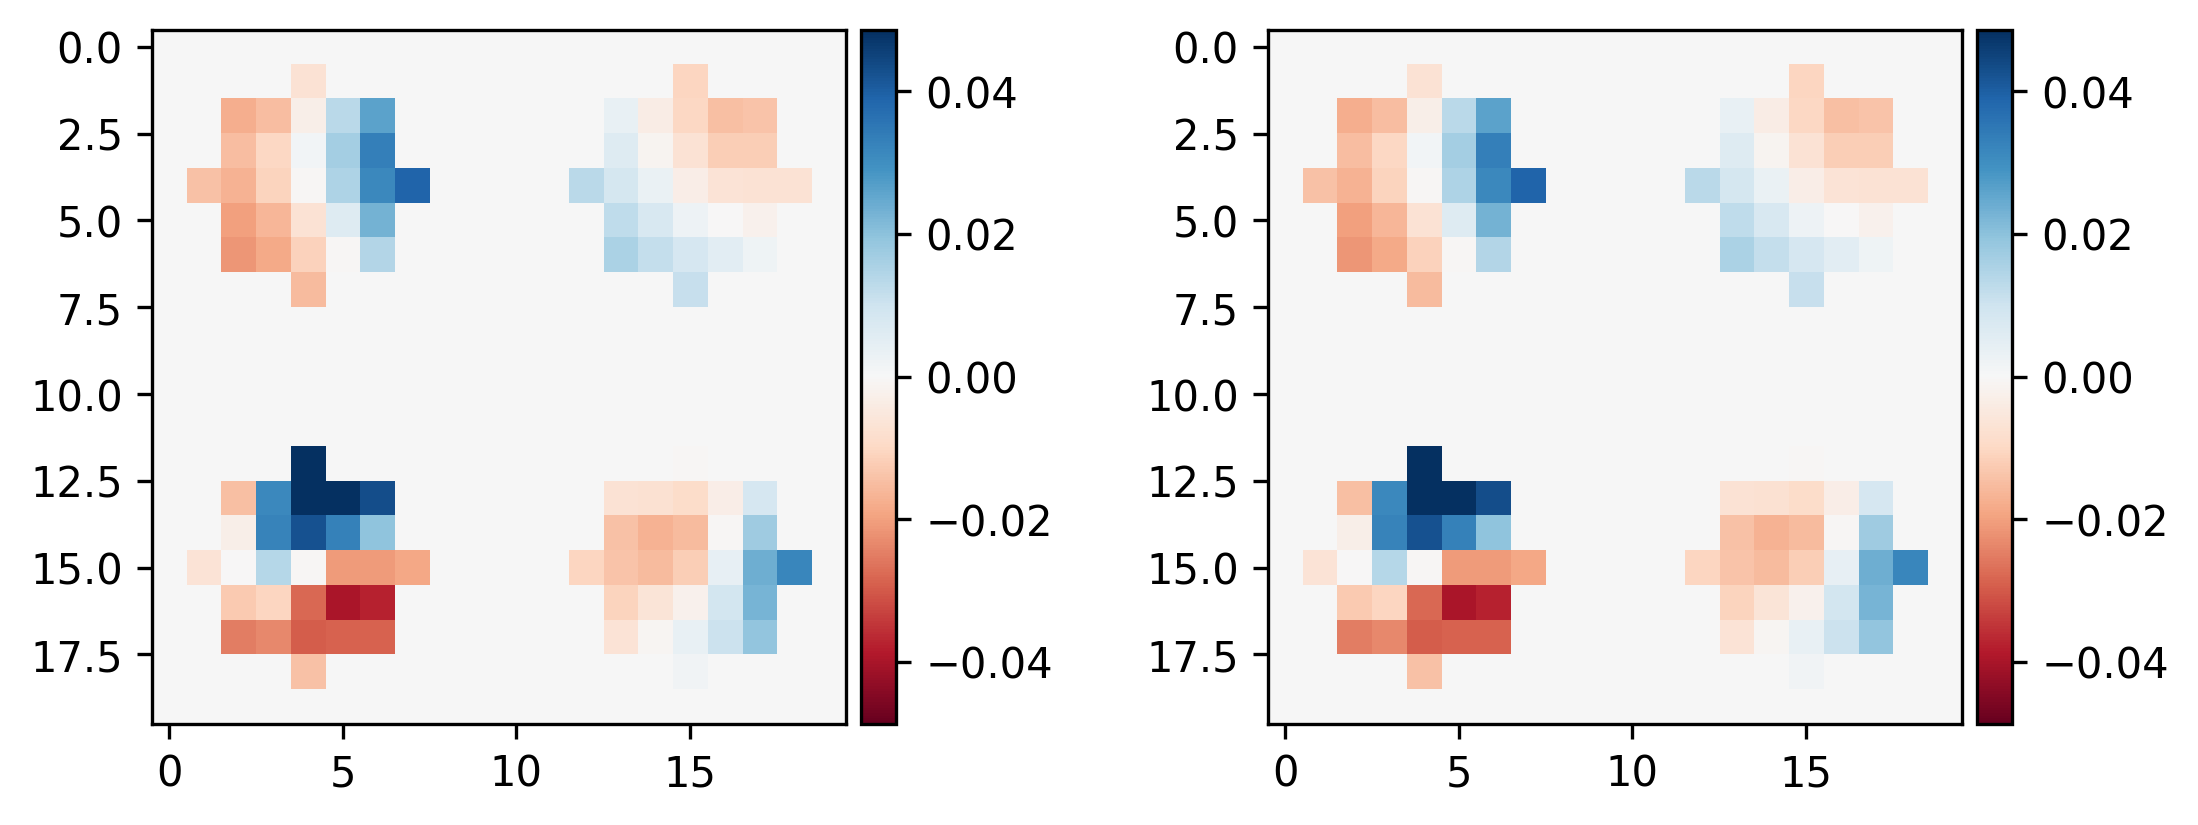

In [16]:
with np.load(data_dir+'/layer4/v{v}/y_v{v}.npz'.format(v=Version)) as data:
    print(list(data.keys()))
    print(data['W'].reshape(N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4).shape)
    print(data['l4'].reshape(N4pop,N4,N4).shape)
    wff = data['W'].reshape(N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4)[:,:,:,:,[4,-5],:][:,:,:,:,:,[4,-5]]
    rf = np.sum(wff[:,0]-wff[:,1],axis=(-2,-1))

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace = .5, wspace=.5)
for i in range(2):
    imshowbar(axs[i],rf[i],cmap='RdBu',vmin=-np.max(np.abs(rf[i])),vmax=np.max(np.abs(rf[i])))

['Wt', 'l4t']
(6, 2, 2, 20, 20, 20, 20)
(6, 2, 20, 20)


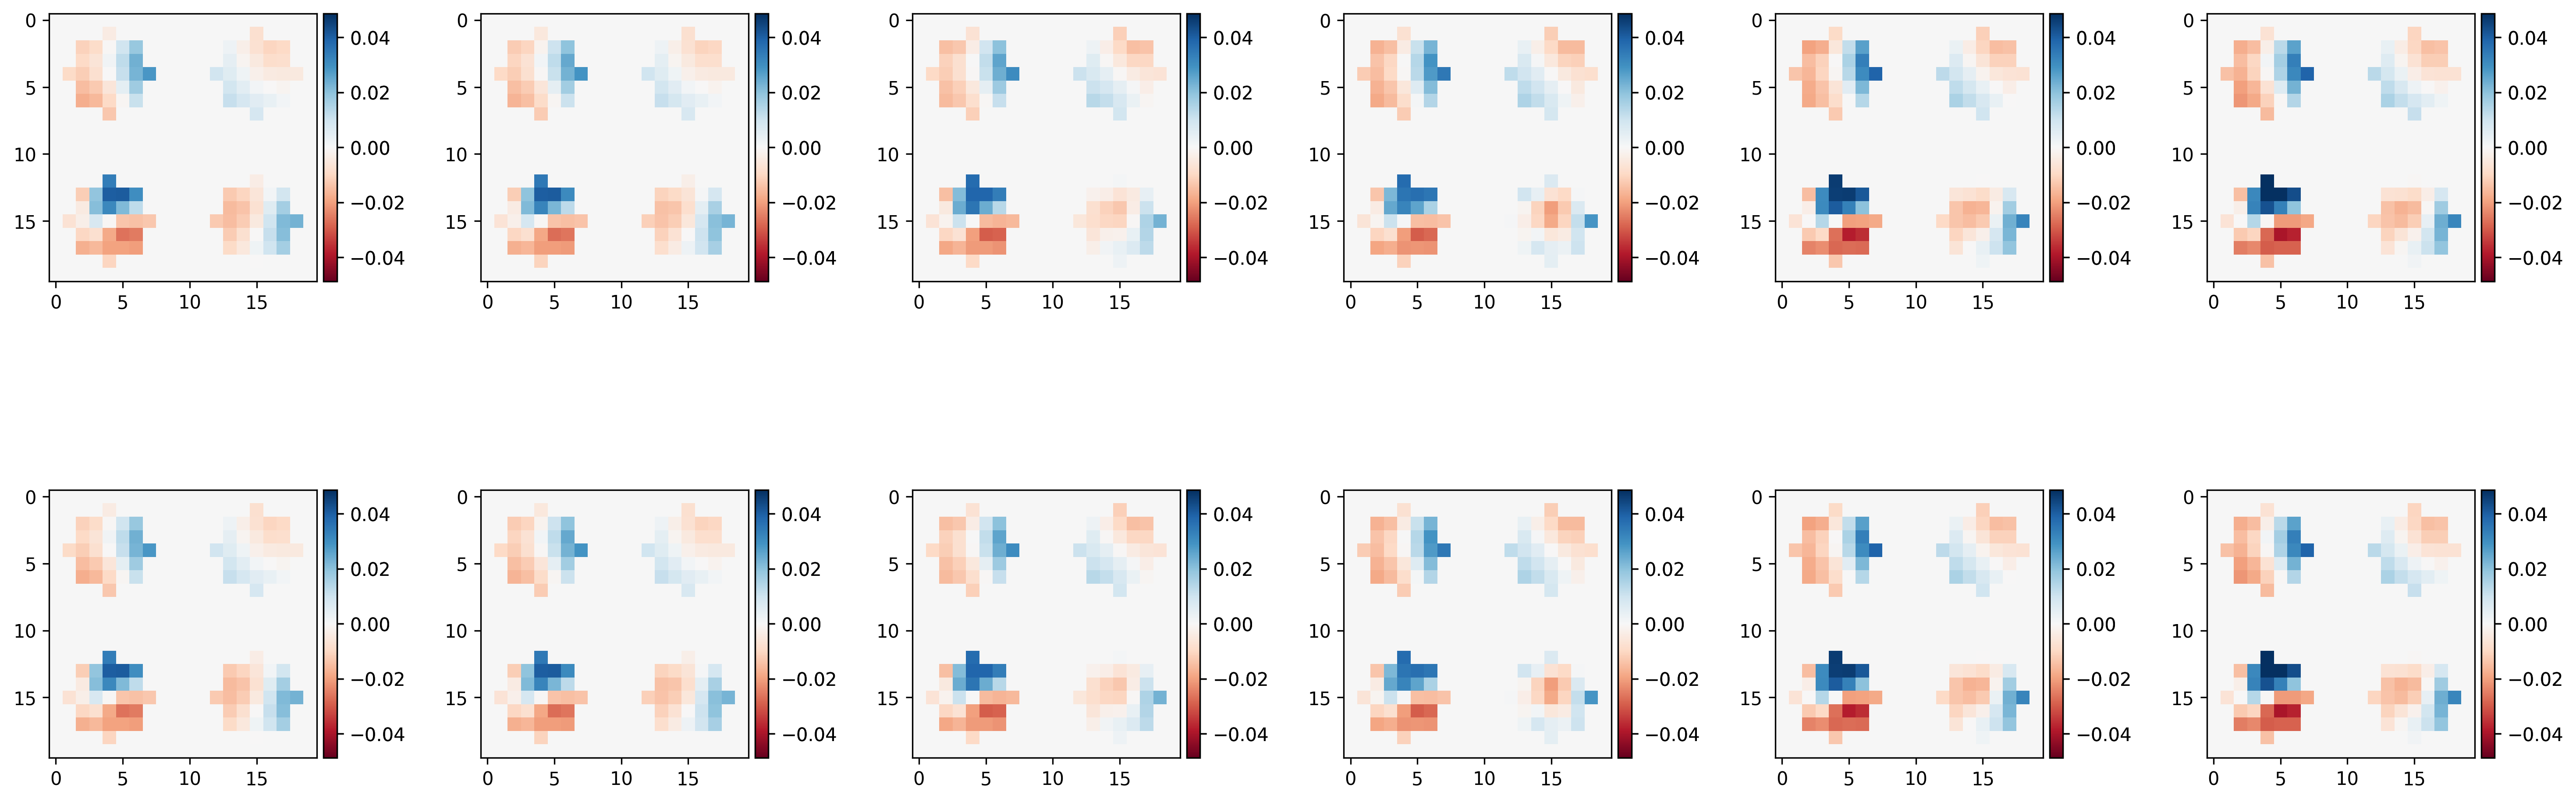

In [17]:
with np.load(data_dir+'/layer4/v{v}/yt_v{v}.npz'.format(v=Version)) as data:
    print(list(data.keys()))
    print(data['Wt'].reshape(-1,N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4).shape)
    print(data['l4t'].reshape(-1,N4pop,N4,N4).shape)
    wfft = data['Wt'].reshape(-1,N4pop,Nlgnpop,Nlgn,Nlgn,N4,N4)[:,:,:,:,:,[4,-5],:][:,:,:,:,:,:,[4,-5]]
    rft = np.sum(wfft[:,:,0]-wfft[:,:,1],axis=(-2,-1))

fig,axs = plt.subplots(2,len(rft),figsize=(4*len(rft),8),dpi=300)
fig.subplots_adjust(hspace = .5, wspace=.5)
for i in range(2):
    for j in range(len(rft)):
        imshowbar(axs[i,j],rft[j,i],cmap='RdBu',vmin=-np.max(np.abs(rft)),vmax=np.max(np.abs(rft)))
        imshowbar(axs[i,j],rft[j,i],cmap='RdBu',vmin=-np.max(np.abs(rft)),vmax=np.max(np.abs(rft)))

In [18]:
import pickle 

from dev_ori_sel_RF import image_dir,data_dir,dynamics_np,\
    system_generation,network
from dev_ori_sel_RF.tools import analysis_tools,misc,update_params_dict

RF_mode = "load_from_external"
system_mode = "one_layer"
connectivity_type = "EI"
load_location = 'local'

load_path = data_dir + "layer4/v{v}/".format(v=Version)
probe_config_dict = pickle.load(open(load_path + "config_v{v}.p".format(v=Version),"rb"))

gamma_ff = probe_config_dict["gamma_lgn"]

probe_config_dict["Wlgn_to4_params"].update({
    "W_mode": RF_mode,
    "load_from_prev_run" : Version})
pdf_path = image_dir + "grating_responses/v{}_{}/".format(Version,load_location)
Nret,Nlgn,N4,N23,Nvert = probe_config_dict["Nret"],probe_config_dict["Nlgn"],probe_config_dict["N4"],\
                         probe_config_dict["N23"],probe_config_dict["Nvert"]
suffix = "_ampl{}".format(probe_config_dict["gamma_lgn"])
misc.ensure_path(pdf_path)

In [45]:
T_pd = 1000
dt = probe_config_dict["dt"]
t = np.arange(0,T_pd/dt,1).astype(int)
probe_config_dict["Inp_params"].update({"input_type" : "moving_grating_online"})
# probe_config_dict["Inp_params"].update({"input_type" : "white_noise_online"})
last_timestep = t[-1]
probe_config_dict.update({
                    "last_timestep" : last_timestep,
                    "RF_mode" : RF_mode,
                    "system" : system_mode,
                    "Version" : Version
                    })
n = network.Network(Version,probe_config_dict,load_location=load_location)#,ampl_het=0.,spatial_freq_het=0.
kwargs = {
            ## parameters for moving gratings
            "num_freq" : 1,
            "spat_frequencies" : np.array([40,60,80]),#40,60,90
            "orientations" : np.linspace(0,np.pi,4,endpoint=False),
            "Nsur" : 10,
}
lgn = n.generate_inputs(full_lgn_output=True,last_timestep=last_timestep,\
                        same_EI_input=True,**kwargs)
# lgn += 0.1
lgn -= np.nanmin(lgn) #- 0.5
print("lgn",lgn.shape)

mode in get_RFs load_from_external
 
Load ff connection from version 3
 
profile_conn Gaussian
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)
CHECK radius 0.3
arbor (20, 20, 20, 20)

CHECK CONN VALS Gaussian 0.16206370216865573 0.1634853135911878 0.2004777735523877 0.7074948371359112
orig max ew 2.977428066551318 0.95
max_ew 0.95
WEE=3.6373674721700744,WEI=3.1906732212018207,WIE=3.6692742043820923,WII=3.19067322120182
omega_i=Wie-Wee=0.031906732212017896
omega_e=Wii-Wei=-8.881784197001252e-16

mode in generate_inputs moving_grating_online
lgn (2, 1200, 1, 4, 10)


In [89]:
lgn_rshp = lgn.reshape(2,-1,400,4,10)
print(lgn_rshp.shape)
lgn_rshp = lgn_rshp.transpose((0,2,3,4,1))
print(lgn_rshp.shape)
lgn_rshp = lgn_rshp.reshape(2,400,4,3,10)
print(lgn_rshp.shape)
lgn_rshp = lgn_rshp.reshape(2,400,3,4,10)
print(lgn_rshp.shape)

(2, 3, 400, 4, 10)
(2, 400, 4, 10, 3)
(2, 400, 4, 3, 10)
(2, 400, 3, 4, 10)


In [21]:
_,Wlgn_to_4,arbor_on,arbor_off,arbor2,_,W4to4 = n.system
################################# initialization ###############################
np.random.seed(probe_config_dict["random_seed"]*113)
l40 = np.random.uniform(0,1,2*N4*N4*Nvert)*0.1
y0 = l40
def dynamics_system(y,inp_ff,Wff,W4to4,W4to23,\
                    W23to23,W23to4,gamma_rec,gamma_ff,N4,N23,tau):
    return dynamics_np.dynamics_onelayer(y,inp_ff,Wff,W4to4,gamma_rec,gamma_ff,N4,\
                                        tau,fio=fio_rect)
if connectivity_type=="EI":
    def dynamics_system(y,inp_ff,Wff,W4to4,W4to23,\
                        W23to23,W23to4,gamma_rec,gamma_ff,N4,N23,tau):
        return dynamics_np.dynamics_onelayer_fullinput(y,inp_ff,Wff,W4to4,gamma_rec,\
                                                        gamma_ff,N4,tau,fio=fio_rect)
W4to23 = 0
W23to4 = 0
W23to23= 0

In [22]:
if probe_config_dict["tau"]!=1:
    tau = np.ones((N4**2*2*Nvert),dtype=float)
    tau[N4**2*Nvert:] *= probe_config_dict["tau"]
else:
    tau = 1.

In [91]:
def fio_lin(x):
    return x
def fio_rect(x):
    x[x<0] = 0
    return x
def fio_powerlaw(x):
    x[x<0] = 0
    return x**2

I = np.linalg.inv(np.diagflat(np.ones(N4*N4*2*Nvert)) - W4to4)

print("Wlgn_to_4",Wlgn_to_4.shape,lgn_rshp.shape)
gamma_rec = probe_config_dict["gamma_4"]
temporal_duration = 500
num_reps = t[-1]/temporal_duration
for i,spat_frequency in enumerate(kwargs["spat_frequencies"]):
    all_phase = []
    act_last_timestep = []
    for j,orientation in enumerate(kwargs["orientations"]):
        mod_ratio = []
        phases = []
        yt = [y0]
        y = y0
        It = [l40*0]
        for kt in t:
            lgn_t = int((kt//temporal_duration)%kwargs["Nsur"])#
            # inp = lgn[:2,:,0]
            inp = lgn_rshp[:,:,i,j,lgn_t]
            out = dynamics_system(y,inp,Wlgn_to_4,W4to4,W4to23,W23to23,\
                                 W23to4,gamma_rec,gamma_ff,N4*N4*Nvert,N23**2,tau)
            try:
                dy = out[0]
            except:
                dy = out
            y = y + dt*dy
            yt.append( y )

            # ff input
            ff_inp_E = gamma_ff*(np.dot(Wlgn_to_4[0,:,:],inp[0,:])+\
                                 np.dot(Wlgn_to_4[1,:,:],inp[1,:]))
            ff_inp_I = gamma_ff*(np.dot(Wlgn_to_4[2,:,:],inp[0,:])+\
                                 np.dot(Wlgn_to_4[3,:,:],inp[1,:]))				
            It.append(np.concatenate([ff_inp_E,ff_inp_I]))

        yt = np.array(yt)
        It = np.array(It)
        print("It",It.shape,yt.shape)

        ## collect last responses for all orientations
        ## take max response over last moving grating
        last_response = np.nanmax(yt[-temporal_duration*kwargs["Nsur"]:,...],axis=0)
        ## take mean response over last moving grating
        # last_response = np.nanmean(yt[-temporal_duration*kwargs["Nsur"]:,...],axis=0)
        ## take last frame of ff input to show pattern
        last_input = It[-1,...]
        act_last_timestep.append(last_response)

        t1 = 500
        t2 = int(probe_config_dict["last_timestep"]+1)
        dT = t2-t1
        temp_freq = int((last_timestep+1)//temporal_duration//kwargs["Nsur"])
        print("temp_freq",temp_freq)
        if system_mode=="one_layer":
            labels = ["L4,E","L4,I"]
            L4_size = N4*N4*Nvert
            yt_list = [yt[t1:t2,:L4_size].reshape(dT,N4,N4*Nvert),\
                        yt[t1:t2,L4_size:].reshape(dT,N4,N4*Nvert)]
            yfinal_list = [last_response[:L4_size].reshape(N4,N4*Nvert),\
                            last_response[L4_size:].reshape(N4,N4*Nvert)]
            It_list = [It[t1:t2,:L4_size].reshape(dT,N4,N4*Nvert),\
                        It[t1:t2,L4_size:L4_size*2].reshape(dT,N4,N4*Nvert)]
            Ifinal_list = [last_input[:L4_size].reshape(N4,N4*Nvert),\
                            last_input[L4_size:L4_size*2].reshape(N4,N4*Nvert)]


        trace_list = []
        spectrum_list = []
        for yt_pop in yt_list:
            ## compute modulation ratio per pixel
            trace = np.nanmean(yt_pop,axis=(1,2))
            spectrum_avg = np.abs(np.fft.fftshift(np.fft.fft(trace-np.nanmean(trace))))
            spectrum = np.abs(np.fft.fft(yt_pop-np.nanmean(yt_pop,axis=0),axis=0))
            trace_list.append(trace)
            spectrum_list.append([spectrum/np.nanmax(spectrum[:40,:],axis=0)[None,:],\
                                  spectrum_avg/np.nanmax(spectrum_avg[:40])])
            mod_ratio.append(analysis_tools.compute_MR(yt_pop,0,temp_freq))
            pref_phase = analysis_tools.find_preferred_abs_phase(yt_pop,\
                                                                    temp_freq=temp_freq)
            print("pref_phase",np.nanmax(pref_phase),np.nanmin(pref_phase))
            phases.append(pref_phase)
        all_phase.append(phases)
        print("Spat frequency={:.0f}, orientation={:.0f} deg".format(spat_frequency,\
                orientation*180/np.pi),len(phases))

        ## figure names
        if system_mode=="one_layer":
            if RF_mode in ("gabor","initialize"):
                filename = "MR_freq{:.0f}_ori{:.0f}_Gabor{}.pdf".format(\
                            spat_frequency,orientation/np.pi*180,suffix)
            elif RF_mode=="load_from_external":
                filename = "MR_freq{:.0f}_ori{:.0f}_V{}{}.pdf".format(\
                            spat_frequency,orientation/np.pi*180,probe_config_dict["Version"],\
                            suffix)

        pp = PdfPages(pdf_path + filename)
        ## figures for comparing stats of L4 and L23
        ncols,nrows = 4,1
        figc = plt.figure(figsize=(6*ncols,5*nrows))
        figc.suptitle("Comparing L4 and L23")
        axes = []
        for k in range(nrows):
            for l in range(ncols):
                axes.append(figc.add_subplot(nrows,ncols,l+k*ncols+1))
        for k,(yt_pop,label) in enumerate(zip(yt_list,labels)):
            ## figs for L4 E,I and L23 E,I
            ncols,nrows = 8,1
            fig = plt.figure(figsize=(6*ncols,5*nrows))
            fig.suptitle(label)

            idmax = np.argmax(mod_ratio[k])
            ymax,xmax = idmax//N4,idmax%N4
            idmin = np.argmin(mod_ratio[k])
            ymin,xmin = idmin//N4,idmin%N4

            if (k<2 and probe_config_dict["Inp_params"]["input_type"]=="moving_grating_online"):
                ## raw input trace
                ax = fig.add_subplot(nrows,ncols,1)
                ax.set_ylabel("Raw input")
                ax.set_xlabel("Timesteps")
                ax.plot(np.nanmean(lgn_rshp[0,:,i,j,:],axis=1),"-k",label="avg")
                ax.plot(np.nanmean(lgn_rshp[1,:,i,j,:],axis=1),"--k",label="avg")
                ax.plot(lgn_rshp[0,:,i,j,:].reshape(-1,N4,N4*Nvert)[:,ymax,xmax],"-",c="gray",label="max mod")
                ax.plot(lgn_rshp[1,:,i,j,:].reshape(-1,N4,N4*Nvert)[:,ymax,xmax],"--",c="gray",label="max mod")
                ax.legend(loc="best")

            if (k<2):
                ## input trace to L4 (raw input convolved with RF)
                ax = fig.add_subplot(nrows,ncols,2)
                ax.set_ylabel("Input to LGN")
                ax.set_xlabel("Timesteps")
                ax.plot(np.arange(t1,t2),np.nanmean(It_list[k],axis=(1,2)),"-k",label="avg")
                ax.plot(np.arange(t1,t2),It_list[k][:,ymax,xmax],"-",c="gray",label="max mod")
                # ax.plot(np.arange(t1,t2),yt_pop[:,ymin,xmin],"--",c="gray",label="min mod")
                ax.legend(loc="best")


            ## activity trace
            ax = fig.add_subplot(nrows,ncols,3)
            ax.set_ylabel("Activity")
            ax.set_xlabel("Timesteps")
            ax.plot(np.arange(t1,t2),trace_list[k],"-k",label="avg")
            ax.plot(np.arange(t1,t2),yt_pop[:,ymax,xmax],"-",c="gray",label="max mod")
            # ax.plot(np.arange(t1,t2),yt_pop[:,ymin,xmin],"--",c="gray",label="min mod")
            ax.legend(loc="best")

            ## frequency spectrum
            ax = fig.add_subplot(nrows,ncols,4)
            ax.set_ylabel("Spectrum")
            ax.set_xlabel("Frequency")
            ax.plot(spectrum_list[k][0][:,ymax,xmax],"-",c="gray",label="max mod")
            ax.plot(spectrum_list[k][0][:,ymin,xmin],"--",c="gray",label="min mod")
            ax.plot(spectrum_list[k][1],"-k",label="avg")
            ax.set_xlim(0,10*temp_freq)
            ax.set_ylim(0,1)

            if k<2:
                ## input from LGN to L4
                ax = fig.add_subplot(nrows,ncols,5)
                ax.set_title("FF input last timestep")
                im=ax.imshow(Ifinal_list[k],interpolation="nearest",cmap="binary")
                plt.colorbar(im,ax=ax)

            ## max/mean resposne over last moving grating
            ax = fig.add_subplot(nrows,ncols,6)
            ax.set_title("Activity last timestep")
            # im=ax.imshow(yfinal_list[k],interpolation="nearest",cmap="binary")
            im=ax.imshow(np.nanmean(yt_pop[-temporal_duration*kwargs["Nsur"]:,:,:],axis=0),interpolation="nearest",cmap="binary")
            plt.colorbar(im,ax=ax)

            ax = fig.add_subplot(nrows,ncols,7)
            ax.set_title("Modulation ratio")
            im=ax.imshow(mod_ratio[k],interpolation="nearest",cmap="binary",vmin=0,vmax=1)
            plt.colorbar(im,ax=ax)

            ax = fig.add_subplot(nrows,ncols,8)
            ax.set_title("Phase preference")
            im=ax.imshow(all_phase[-1][k],interpolation="nearest",cmap="hsv",vmin=0,vmax=2*np.pi)
            plt.colorbar(im,ax=ax)
            pp.savefig(fig,dpi=300,bbox_inches="tight")
            plt.close(fig)


            axes[0].plot(np.sort(yt_pop[-temporal_duration*kwargs["Nsur"]:,:].mean(0).flatten()),\
                        np.linspace(0,1,yfinal_list[k].size),'-',label=label)
            axes[1].plot(np.sort(mod_ratio[k].flatten()),\
                        np.linspace(0,1,mod_ratio[k].size),'-',label=label)

        axes[0].set_xlabel("Activity")
        axes[0].set_ylabel("Cumulative distribution")
        axes[1].set_xlabel("Modulation ratio")
        axes[1].set_ylabel("Cumulative distribution")
        axes[1].set_xlim(0,1)
        for ax in axes:
            ax.legend(loc="best")
        pp.savefig(figc,dpi=300,bbox_inches="tight")
        plt.close(figc)


        ## LGN input
        # exc_ff_inp = gamma_ff * (np.dot(Wlgn_to_4[0,:,:],lgn[0,i,j,0,:]) +\
        # 						 np.dot(Wlgn_to_4[1,:,:],lgn[1,i,j,0,:]))
        exc_ff_inp = gamma_ff * (np.dot(Wlgn_to_4[0,:,:],inp[0,:]) +\
                                 np.dot(Wlgn_to_4[1,:,:],inp[1,:]))
        ## visual stimuli
        fig = plt.figure(figsize=(18,5))
        ax = fig.add_subplot(131)
        ax.set_title("Input ON")
        im=ax.imshow(gamma_ff*inp[0,:].reshape(Nlgn,Nlgn),interpolation="nearest",\
                    cmap="binary")
        plt.colorbar(im,ax=ax)
        ax = fig.add_subplot(132)
        ax.set_title("Input OFF")
        im=ax.imshow(gamma_ff*inp[1,:].reshape(Nlgn,Nlgn),interpolation="nearest",\
                    cmap="binary")
        plt.colorbar(im,ax=ax)
        ax = fig.add_subplot(133)
        ax.set_title("Total LGN input")
        im=ax.imshow(exc_ff_inp.reshape(Nlgn,Nlgn),interpolation="nearest",\
                    cmap="binary")
        plt.colorbar(im,ax=ax)
        pp.savefig(fig,dpi=300,bbox_inches="tight")
        plt.close(fig)

        ## VARIABILITY IN RESPONSE PATTERN DURING ONE GRATING OSCILLATION
        oscillation_duration = (last_timestep+1)/temp_freq
        timesteps = np.array([last_timestep-oscillation_duration,\
                             last_timestep-3/4.*oscillation_duration,\
                             last_timestep-1./2*oscillation_duration,\
                             last_timestep-1./4*oscillation_duration]).astype(int)
        ncol,nrow = len(timesteps),1
        fig = plt.figure(figsize=(6*ncol,5*nrow))
        for k in range(ncol):
            ax = fig.add_subplot(nrow,ncol,k+1)
            ax.set_title("t={}".format(timesteps[k]))
            im=ax.imshow(yt[timesteps[k],:L4_size].reshape(N4,N4),interpolation="nearest",\
                        cmap="binary")
            plt.colorbar(im,ax=ax)
        pp.savefig(fig,dpi=300,bbox_inches="tight")
        plt.close(fig)

        pp.close()
        print("plot done",orientation,spat_frequency)

Wlgn_to_4 (4, 400, 400) (2, 400, 3, 4, 10)
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.2888585245496587 1.2888585245496587
pref_phase 1.2888585245496587 1.2888585245496587
Spat frequency=40, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 40
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 2.5777170490993173 2.5777170490993173
pref_phase 2.5777170490993173 2.5777170490993173
Spat frequency=40, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 40
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 2.5777170490993173 2.5777170490993173
pref_phase 2.5777170490993173 2.5777170490993173
Spat frequency=40, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 40
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 3.222146311374147 3.222146311374147
pref_phase 3.222146311374147 3.222146311374147
Spat frequency=40, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 40
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 0.6444292622748293 0.6444292622748293
pref_phase 0.6444292622748293 0.6444292622748293
Spat frequency=60, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 0.6444292622748293 0.6444292622748293
pref_phase 0.6444292622748293 0.6444292622748293
Spat frequency=60, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 3.866575573648976 3.866575573648976
pref_phase 3.866575573648976 3.866575573648976
Spat frequency=60, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 2.5777170490993173 2.5777170490993173
pref_phase 2.5777170490993173 2.5777170490993173
Spat frequency=60, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 60
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 1.2888585245496587 1.2888585245496587
pref_phase 1.2888585245496587 1.2888585245496587
Spat frequency=80, orientation=0 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.0 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 5.155434098198635 5.155434098198635
pref_phase 5.155434098198635 5.155434098198635
Spat frequency=80, orientation=45 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 0.7853981633974483 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 4.5110048359238055 4.5110048359238055
pref_phase 4.5110048359238055 4.5110048359238055
Spat frequency=80, orientation=90 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 1.5707963267948966 80
It (20001, 800) (20001, 800)
temp_freq 4
pref_phase 3.866575573648976 3.866575573648976
pref_phase 3.866575573648976 3.866575573648976
Spat frequency=80, orientation=135 deg 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot done 2.356194490192345 80


In [92]:
all_phase = np.array(all_phase)
act_last_timestep = np.array(act_last_timestep)
num_oris = len(kwargs["orientations"])
if system_mode=="one_layer":
    labels = ["L4,E","L4,I"]
    L4_size = N4*N4*Nvert
    final_act_list = [act_last_timestep[:,:L4_size].reshape(num_oris,N4,N4*Nvert),\
                      act_last_timestep[:,L4_size:].reshape(num_oris,N4,N4*Nvert)]
    all_phase_list = [all_phase[:,0,:,:],all_phase[:,1,:,:]]

## file names
if system_mode=="one_layer":
    if RF_mode=="gabor":
        filename = "ori_phase_freq{:.0f}_Gabor{}.pdf".format(spat_frequency,suffix)
    elif RF_mode=="initialize":
        filename = "ori_phase_freq{:.0f}_init{}.pdf".format(spat_frequency,suffix)
    elif RF_mode=="load_from_external":
        filename = "ori_phase_freq{:.0f}_V{}{}.pdf".format(spat_frequency,\
                                                         probe_config_dict["Version"],suffix)
pp = PdfPages(pdf_path + filename)

sf = Wlgn_to_4[0,...] - Wlgn_to_4[1,...]
rA = int(probe_config_dict["Wlgn_to4_params"]["r_A_on"] * N4)
DA = 2*rA + 5
RF,_,_,_ = analysis_tools.get_RF_form(sf,N4,Nlgn,DA,calc_PF=False,Nvert=Nvert,mode="o")
ext = np.nanmax(np.abs(RF))
fig = plt.figure(figsize=(6,5))
fig.suptitle("RFs used")
ax = fig.add_subplot(111)
im=ax.imshow(RF,interpolation="nearest",cmap="RdBu_r",vmin=-ext,vmax=ext)
plt.colorbar(im,ax=ax)
pp.savefig(dpi=300,bbox_inches="tight")
plt.close(fig)

ncols,nrows = 4,1
orientations_binning = np.concatenate([kwargs["orientations"],np.array([np.pi])])
# orientations_binning -= np.pi/2./num_oris
for j,(final_act,jall_phase) in enumerate(zip(final_act_list,all_phase_list)):
    opm = analysis_tools.compute_orientation_tuning_from_activity(final_act,\
                                                    kwargs["orientations"]*2,norm=True)
    sel = np.abs(opm)
    ori = np.angle(opm)*0.5
    ori = ori - (np.sign(ori)-1)*0.5*np.pi

    ori_bin = np.searchsorted(orientations_binning,ori,side='left')
    ori_bin[ori_bin==num_oris] = 0
    ori_bin[ori_bin==num_oris+1] = 0
    pref_phase_full = np.zeros_like(ori,dtype=float)
    for y in range(ori.shape[0]):
        for x in range(ori.shape[1]):
            pref_phase_full[y,x] = jall_phase[ori_bin[y,x],y,x]

    fig = plt.figure(figsize=(6*ncols,nrows*5))
    ax = fig.add_subplot(nrows,ncols,1)
    ax.set_title("Orientation preference map {}".format(labels[j]))
    # im=ax.imshow(misc.plot_complex_map(opm),interpolation="nearest")
    im=ax.imshow(ori,cmap="twilight",interpolation="nearest",vmin=0,vmax=np.pi)
    plt.colorbar(im,ax=ax,orientation="horizontal")

    ax = fig.add_subplot(nrows,ncols,2)
    opm_fft = np.abs(np.fft.fftshift(np.fft.fft2(opm - np.nanmean(opm))))
    ax.set_title("Spectrum Orientation preference map {}".format(labels[j]))
    im=ax.imshow(opm_fft,cmap="binary",interpolation="nearest")
    plt.colorbar(im,ax=ax,orientation="horizontal")

    ax = fig.add_subplot(nrows,ncols,3)
    ax.set_title("Preferred absolute phase {}".format(labels[j]))
    im=ax.imshow(pref_phase_full,interpolation="nearest",cmap="twilight",vmin=0,vmax=2*np.pi)
    plt.colorbar(im,ax=ax,orientation="horizontal")

    ax = fig.add_subplot(nrows,ncols,4)
    opm_fft = np.abs(np.fft.fftshift(np.fft.fft2(pref_phase_full - np.nanmean(pref_phase_full))))
    ax.set_title("Spectrum Preferred absolute phase {}".format(labels[j]))
    im=ax.imshow(opm_fft,cmap="binary",interpolation="nearest")
    plt.colorbar(im,ax=ax,orientation="horizontal")

    pp.savefig(dpi=300,bbox_inches="tight")
    plt.close(fig)

pp.close()